In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt       # Standard plotting library
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

X = pd.read_csv('data/application_train_visual.csv')


In [75]:
print(np.where(X['TARGET'] == 1)[0].shape[0])
print(np.where(X['TARGET'] == 0)[0].shape[0]) 
print(len(X))

24803
282415
307511


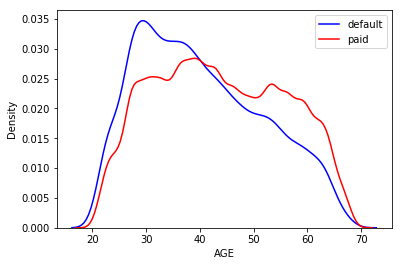

In [76]:
# lets see loan payable by age 
sns.kdeplot(X[X.TARGET == 1]['AGE'], color = 'blue', label = 'default')
sns.kdeplot(X[X.TARGET == 0]['AGE'], color = 'red', label = 'paid')
plt.xlabel('AGE')
plt.ylabel('Density')
plt.show()

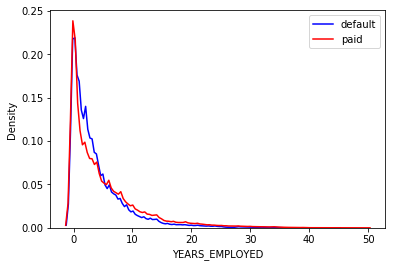

count    307511.000000
mean       1954.655755
std        2306.974157
min           0.000000
25%         289.000000
50%        1213.000000
75%        2760.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

In [87]:
# lets see loan payable by age
X['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)
X['YEARS_EMPLOYED'] = X['DAYS_EMPLOYED'] // 365
sns.kdeplot(X[X.TARGET == 1]['YEARS_EMPLOYED'], color = 'blue', label = 'default')
sns.kdeplot(X[X.TARGET == 0]['YEARS_EMPLOYED'], color = 'red', label = 'paid')
plt.xlabel('YEARS_EMPLOYED')
plt.ylabel('Density')
plt.show()



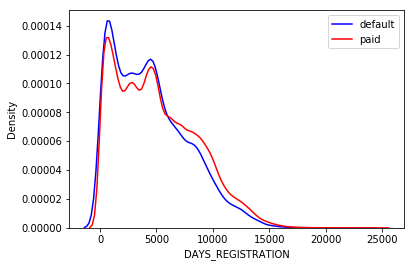

In [89]:
X['DAYS_REGISTRATION'] = X['DAYS_REGISTRATION'].abs()
sns.kdeplot(X[X.TARGET == 1]['DAYS_REGISTRATION'], color = 'blue', label = 'default')
sns.kdeplot(X[X.TARGET == 0]['DAYS_REGISTRATION'], color = 'red', label = 'paid')
plt.xlabel('DAYS_REGISTRATION')
plt.ylabel('Density')
plt.show()

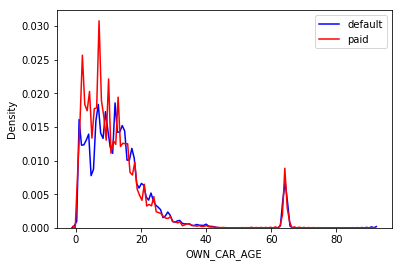

In [90]:
sns.kdeplot(X[X.TARGET == 1]['OWN_CAR_AGE'], color = 'blue', label = 'default')
sns.kdeplot(X[X.TARGET == 0]['OWN_CAR_AGE'], color = 'red', label = 'paid')
plt.xlabel('OWN_CAR_AGE')
plt.ylabel('Density')
plt.show()

Above graph shows that younger applicants are more likely to default than older applicants

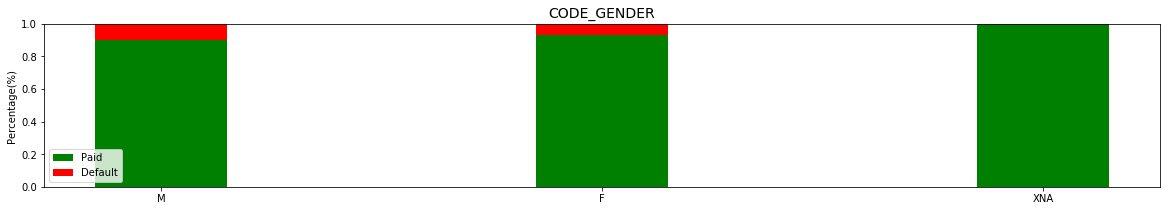

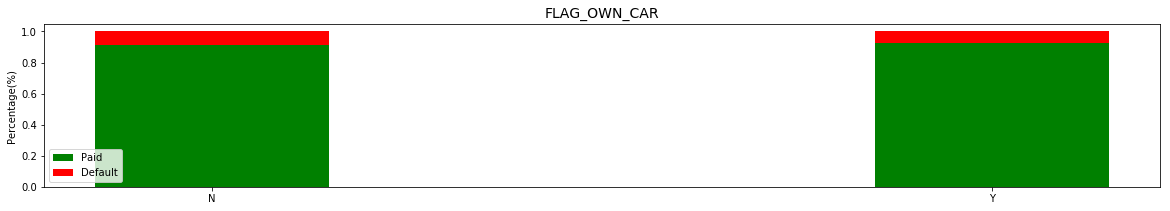

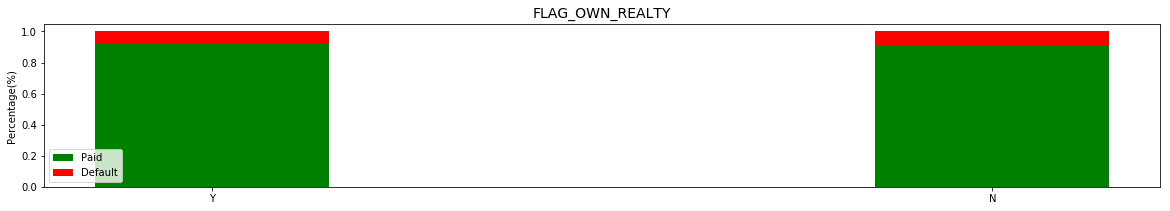

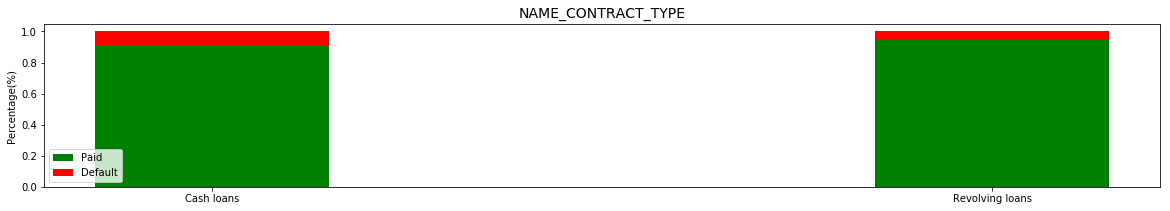

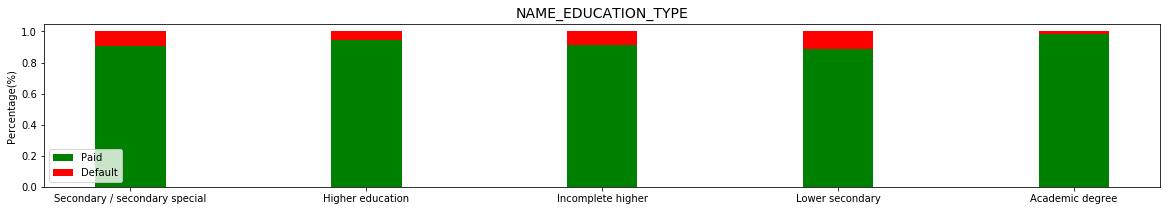

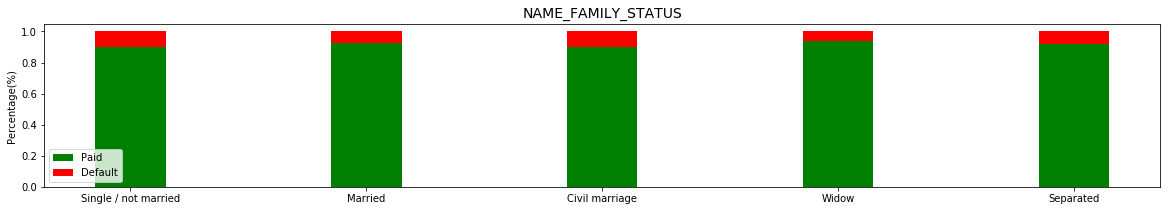

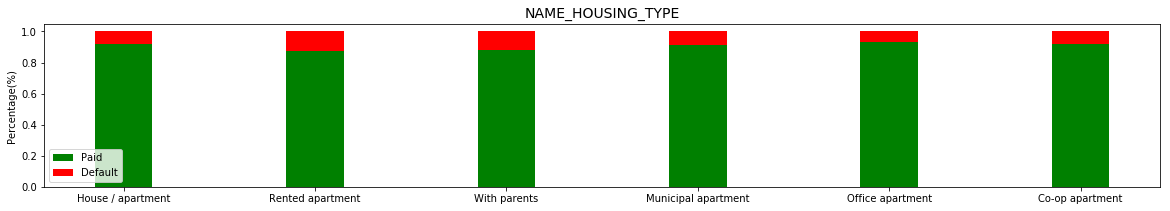

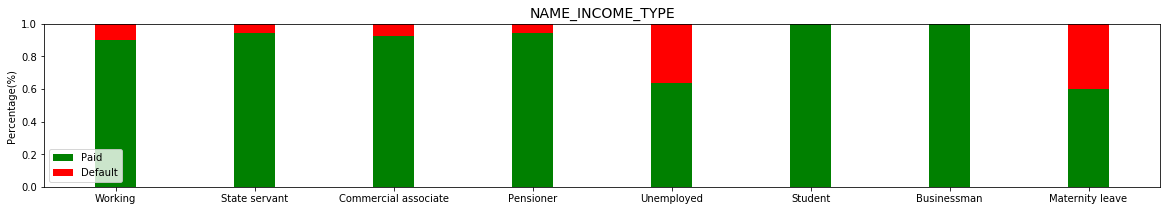

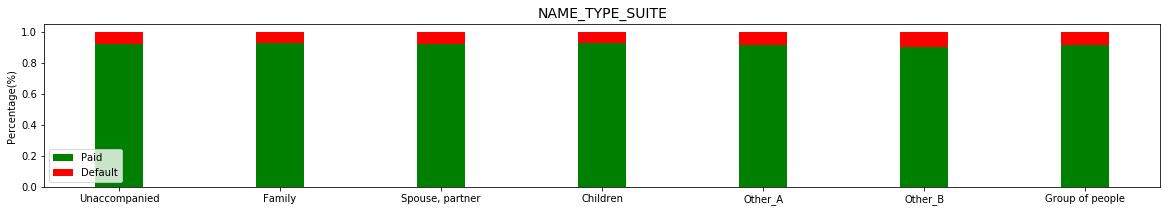

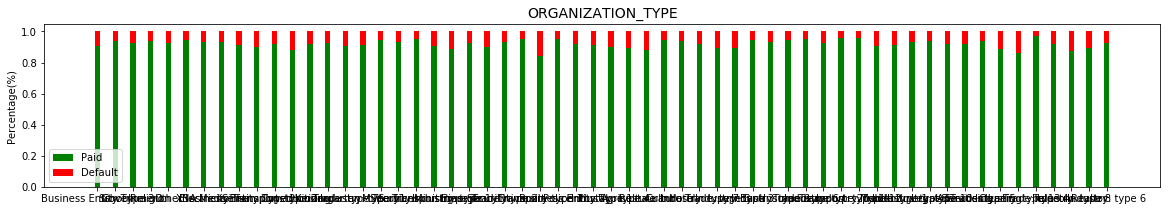

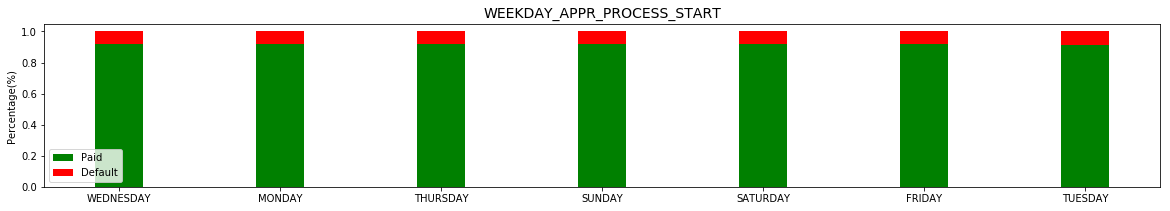

In [54]:
cat_features = [col for col in X.columns if X[col].dtype == 'object']
for cat_i in cat_features:
    cat_ = X[cat_i].unique()
    fig, ax = plt.subplots(figsize=(20,3))
    width = 0.3
    for k, v in enumerate(cat_):
        if pd.isnull(v):
            repay_percentage = X[(X[cat_i].isnull()) & (X['TARGET'] == 0)].shape[0]/ \
                X[(X[cat_i].isnull())].shape[0]
        else:
            repay_percentage = X[(X[cat_i] == v) & (X['TARGET'] == 0)].shape[0]/ \
                X[(X[cat_i] == v)].shape[0]
        plt.bar(k, repay_percentage, width = width, color='g')
        plt.bar(k, 1 - repay_percentage, width = width, bottom=repay_percentage, color='r')
    ax.set_xticks(list(range(k + 1)))
    ax.set_xticklabels(cat_)
    plt.legend(['Paid', 'Default'], loc='lower left')
    plt.title(cat_i, fontsize=14)
    plt.ylabel('Percentage(%)')
    plt.show()

Observations: 
Name Income Type of Unemployed and maternity leave have high tendency to default